# Importing the Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Dataset

In [46]:
data = pd.read_csv(r'C:\Users\amaan\Downloads\social_media_sentiment_real_content.csv')

# Understanding the Dataset

In [4]:
data.head()

,tweet_id,entity,sentiment,tweet_content,user_name,location,retweets,likes,date,source
0,1,Samsung,negative,Love shopping on Amazon.,daniel_blue,Nevada,15,4,2024-06-20,web
1,2,Apple,neutral,Just joined a new group on Facebook.,chris_black,Virginia,12,3,2024-06-18,web
2,3,Google,negative,Microsoft Office is so useful.,karen_purple,New York,20,79,2024-06-17,mobile
3,4,Adidas,neutral,Just joined a new group on Facebook.,lisa_jones,Florida,18,11,2024-07-09,web
4,5,Adidas,neutral,Just started using Teams for work.,daniel_blue,Nevada,6,7,2024-07-10,web


In [63]:
data.isnull().value_counts().reset_index()

,tweet_id,entity,sentiment,tweet_content,user_name,location,retweets,likes,date,source,0
0,False,False,False,False,False,False,False,False,False,False,1000


Ok, so we have no null values in the Dataset

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet_id       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   tweet_content  1000 non-null   object
 4   user_name      1000 non-null   object
 5   location       1000 non-null   object
 6   retweets       1000 non-null   int64 
 7   likes          1000 non-null   int64 
 8   date           1000 non-null   object
 9   source         1000 non-null   object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


There are 1000 rows in total and 10 columns in the Dataset.

# Entity count of tweets

In [86]:
entity_counts = data['entity'].value_counts().reset_index()
entity_counts.columns = ['Entity', 'Count']
pd.DataFrame(entity_counts)


,Entity,Count
0,Adidas,116
1,Google,113
2,Samsung,108
3,Facebook,105
4,Twitter,103
5,Amazon,102
6,Tesla,95
7,Apple,91
8,Nike,85
9,Microsoft,82


# Likes vs Retweets vs Count

In [85]:
likes_by_entity = data.groupby('entity').agg({'likes':'sum','retweets': 'sum','entity':'size'})
likes_by_entity.index.name = 'Entity'
likes_by_entity.columns = ['Likes','Retweets', 'Count']
likes_by_entity = likes_by_entity.sort_values(by='Count',ascending= False)
likes_by_entity

,Likes,Retweets,Count
Entity,,,
Adidas,5803,1200,116
Google,5796,1112,113
Samsung,4899,1038,108
Facebook,5141,1164,105
Twitter,4899,1067,103
Amazon,5204,1041,102
Tesla,4856,962,95
Apple,4624,941,91
Nike,4103,894,85


Adidas is leading in terms of all these aspects
We can also infer that the count of Retweets and total count have direct relation. Higher the total count, higher the retweets
Whereas, Incase of Likes it's not that related. For example, Amazon despite being at number 6 in total count is at number 3 in Most Likes category

# Visualization of Positive sentiment

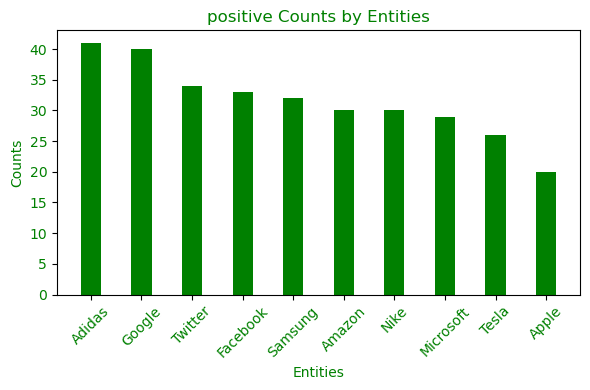

In [33]:

positive_entities = data[data['sentiment']=='positive']
positive_counts = positive_entities['entity'].value_counts()

entities = positive_counts.index
counts = positive_counts.values
plt.figure(figsize=(6, 4))  
plt.bar(entities, counts, color = 'green', width=0.4)
plt.xlabel('Entities',color = 'green')
plt.ylabel('Counts',color = 'green')
plt.title('positive Counts by Entities', color = 'green')

plt.xticks(rotation=45, color = 'green')
plt.yticks(color = 'green')
plt.tight_layout()  
plt.show()

# Visualization of Negative sentiment

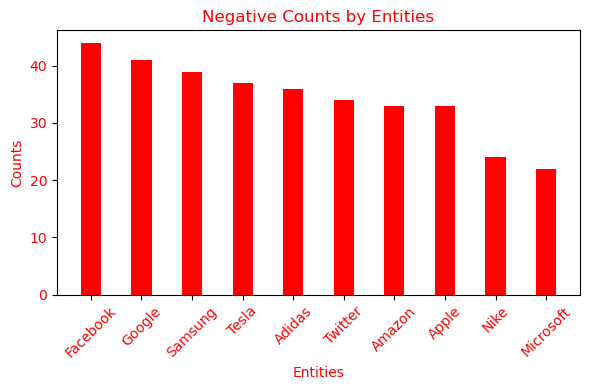

In [32]:
negative_entities = data[data['sentiment']=='negative']
negative_counts = negative_entities['entity'].value_counts()

entities = negative_counts.index
counts = negative_counts.values
plt.figure(figsize=(6, 4))  
plt.bar(entities, counts, color = 'red', width=0.4)
plt.xlabel('Entities',color = 'red')
plt.ylabel('Counts',color = 'red')
plt.title('Negative Counts by Entities', color = 'red')

plt.xticks(rotation=45, color = 'red')
plt.yticks(color = 'red')
plt.tight_layout()  
plt.show()


Facebook has most number of Negative tweets, even though it is at number 4 position in total tweets counts, it ranks highest in Negative tweet count. 
Microsoft has the least number of Negative tweets, but we can't Ignore it's total tweet count. The fact that it has the least number of total tweets definitly affects the outcome

# Source of the Tweets

In [47]:
entity_counts = data['source'].value_counts().reset_index()
entity_counts.columns = ['Source', 'Count']
pd.DataFrame(entity_counts)

,source,Count
0,web,502
1,mobile,498


We can clearly understand that, the total count of tweets from web and mobile are equal with Web source count slightly greater than the Mobile Source

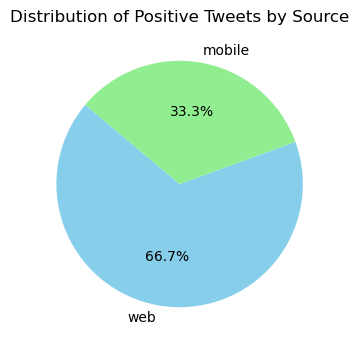

In [42]:
positive_data = data[data['sentiment'] == 'Positive']

source_counts = positive_data['source'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Positive Tweets by Source')
plt.show()


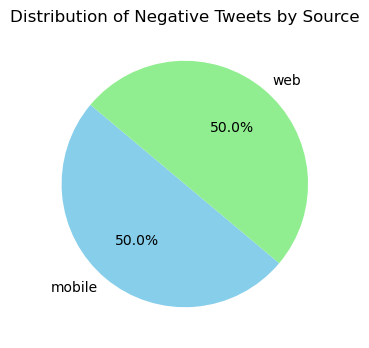

In [43]:

negative_data = data[data['sentiment'] == 'Negative']

source_counts = negative_data['source'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Negative Tweets by Source')
plt.show()


# Location count

In [48]:
entity_counts = data['location'].value_counts().reset_index()
entity_counts.columns = ['Location', 'Count']
pd.DataFrame(entity_counts)

,Location,Count
0,Arizona,116
1,Colorado,104
2,Florida,101
3,Washington,101
4,Texas,101
5,Nevada,100
6,Virginia,100
7,Ohio,96
8,California,91
9,New York,90


We can infer from the above table that, Arizona state is most active on Social media and New york is least active

# Date count

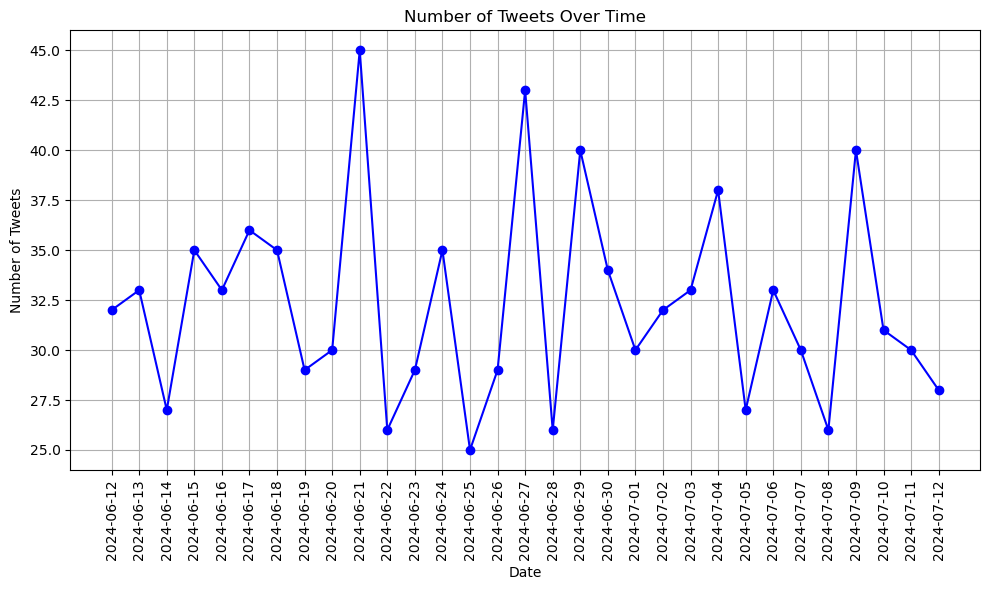

In [60]:
entity_counts = data['date'].value_counts().reset_index()
entity_counts.columns = ['date', 'Count']


entity_counts = entity_counts.sort_values('date')

plt.figure(figsize=(10, 6))
plt.plot(entity_counts['date'], entity_counts['Count'], marker='o', linestyle='-', color='b')
plt.title('Number of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

This data belongs to the tweets posted between '2024-06-12' and '2024-07-12'. This is a duration of 1 month. We can also clearly see that, on '2024-06-21' highest number of tweets were posted and on '2024-06-25' least number of tweets were posted.

This shows 2/3rd of the Positive tweets are from Web and 1/3rd are from Mobile

Half of Negative tweets are from mobile and other half from web

# Most active user 

In [66]:
entity_counts = data['user_name'].value_counts().reset_index()
entity_counts.columns = ['user_name', 'Count']
pd.DataFrame(entity_counts)

,user_name,Count
0,daniel_blue,114
1,karen_purple,106
2,jane_doe,100
3,mark_smith,100
4,chris_black,99
5,mike_brown,99
6,john_doe,98
7,emma_white,96
8,sarah_green,95
9,lisa_jones,93


So, clearly 'daniel_blue' is the most active user.

# Most Viral Tweet

In [30]:
max_likes=data['likes'].max()
max_retweets = data['retweets'].max()
most_viral_tweet=data[(data['likes']==max_likes) & (data['retweets']==max_retweets)]
most_viral_tweet



,tweet_id,entity,sentiment,tweet_content,user_name,location,retweets,likes,date,source
305,306,Tesla,positive,Love the new collection from Nike.,chris_black,Ohio,20,100,2024-06-27,web


This is most viral tweet, " Love the new collection from Nike' but this comes from Tesla Entity. Maybe, that's reason it got viral also the location is Ohio (just saying).